In [35]:
import numpy as np
import pandas as pd

In [36]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
holiday = pd.read_csv('Holiday_calendar.csv')

In [37]:
print(train.shape)
train.head()

(80402, 6)


,application_date,segment,branch_id,state,zone,case_count
0,2017-04-01,1,1.0,WEST BENGAL,EAST,40.0
1,2017-04-03,1,1.0,WEST BENGAL,EAST,5.0
2,2017-04-04,1,1.0,WEST BENGAL,EAST,4.0
3,2017-04-05,1,1.0,WEST BENGAL,EAST,113.0
4,2017-04-07,1,1.0,WEST BENGAL,EAST,76.0


In [38]:
train.isnull().sum()

application_date        0
segment                 0
branch_id           13504
state                   0
zone                13504
case_count              0
dtype: int64

In [ ]:
# print(train.state.unique())
# branch = train.state.unique()
# for each in branch:
#     print('for Branch: {} state is: {}'.format(each, train[train['state']==each].branch_id.unique()))

# ======================================================================
for i in range(len(train)):
    state = train['state'][i]
    if state == 'WEST BENGAL':
        train['branch_id'][i] = 8.0

    if state == 'KARNATAKA':
        train['branch_id'][i] = 64.0
    
    if state == 'TAMIL NADU':
        train['branch_id'][i] = 64.0
    
    if state == 'UTTAR PRADESH':
        train['branch_id'][i] = 14.0
    
    if state == 'PUNJAB':
        train['branch_id'][i] = 62.0
    
    if state == 'MAHARASHTRA':
        train['branch_id'][i] = 19.0
    
    if state == 'ORISSA':
        train['branch_id'][i] = 48.0
    
    if state == 'GUJARAT':
        train['branch_id'][i] = 61.0
    
    if state == 'ASSAM':
        train['branch_id'][i] = 65.0
        
    if state == 'JHARKHAND':
        train['branch_id'][i] = 104.0
    
    if state == 'KERALA':
        train['branch_id'][i] = 82.0
    
    if state == 'CHHATTISGARH':
        train['branch_id'][i] = 84.0
    
    if state == 'BIHAR':
        train['branch_id'][i] = 159.0
    
    if state == 'TRIPURA':
        train['branch_id'][i] = 251.0
    
    if state == 'MADHYA PRADESH':
        train['branch_id'][i] = 147.0
    
    if state == 'HARYANA':
        train['branch_id'][i] = 271.0

# ===============================================================
# zone = train.zone.unique()
# for each in zone:
#     print('for each zone: {} state is: {}'.format(each, train[train['zone']==each].state.unique()))

#     ==============================================================

In [41]:
east = ['WEST BENGAL', 'UTTAR PRADESH', 'ASSAM', 'UTTARAKHAND', 'BIHAR','TRIPURA','ORISSA']
north = ['DELHI', 'PUNJAB', 'HARYANA']
south = ['KARNATAKA', 'TAMIL NADU', 'TELANGANA', 'ANDHRA PRADESH', 'ORISSA', 'JHARKHAND', 'KERALA']
west = ['MAHARASHTRA', 'GUJARAT']
central = ['CHHATTISGARH', 'MADHYA PRADESH']
for i in range(len(train)):
    state = train['state'][i]
    if state in east:
        train['zone'][i] = 'EAST'
    
    if state in north:
        train['zone'][i] = 'NORTH'
    
    if state in south:
        train['zone'][i] = 'SOUTH'
    
    if state in west:
        train['zone'][i] = 'WEST'
    
    if state in central:
        train['zone'][i] = 'CENTRAL'

c:\users\navneet.a.arya\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
c:\users\navneet.a.arya\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
c:\users\navneet.a.arya\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pyd

In [5]:
train['year'] = 1
train['month'] = 1
train['day'] = 1
train['week'] = 1
train['weekend'] = 1
train['holiday'] = 0
import datetime
# Some data engineering on datetime
for i in range(len(train)):
    o_date  = train['application_date'][i]
    date = datetime.datetime.strptime(o_date, '%Y-%m-%d')
    dt = date.isocalendar()
    train['year'][i] = dt[0]
    train['month'][i] = date.month
    train['day'][i] = date.day
    train['week'][i] = dt[1]
    if dt[2] == 5 or dt[2] == 6:
        train['weekend'][i] = 1
    else:
        train['weekend'][i] = 0
    for j in range(len(holiday)):
        holi_date = holiday['Date'][j]
        if(o_date == holi_date):
            train['holiday'][i]=1

c:\users\navneet.a.arya\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
c:\users\navneet.a.arya\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\navneet.a.arya\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

In [44]:
train.head()

,application_date,segment,branch_id,state,zone,case_count
0,2017-04-01,1,8.0,WEST BENGAL,EAST,40.0
1,2017-04-03,1,8.0,WEST BENGAL,EAST,5.0
2,2017-04-04,1,8.0,WEST BENGAL,EAST,4.0
3,2017-04-05,1,8.0,WEST BENGAL,EAST,113.0
4,2017-04-07,1,8.0,WEST BENGAL,EAST,76.0


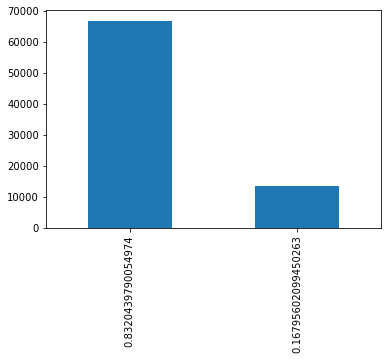

In [24]:
train.segment.value_counts().plot.bar()

In [7]:
y = train.iloc[ :,5].values
train.drop(['case_count','branch_id','state','zone'],axis=1, inplace=True)

In [25]:
x = train.iloc[ : ,1: ].values

In [144]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

clf = RandomForestRegressor()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)


In [27]:
# y_pred.shape
# mean_absolute_percentage_error(y_test, y_pred)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

179.54257090067742

In [125]:
for each in train.columns:
    print("Unique feature in {} is {}".format(each, train[each].nunique()))

Unique feature in application_date is 844
Unique feature in segment is 2
Unique feature in branch_id is 26
Unique feature in state is 20
Unique feature in zone is 5
Unique feature in year is 3
Unique feature in month is 12
Unique feature in day is 31
Unique feature in week is 52
Unique feature in weekend is 2
Unique feature in holiday is 2


In [20]:
train['year'].unique()

array([2017, 2018, 2019], dtype=int64)

,Date,Holiday_name
0,2017-01-01,New Year's Day
1,2017-01-14,Makar Sankranti / Pongal
2,2017-01-26,Republic Day
3,2017-02-24,Maha Shivaratri
4,2017-03-13,Holi


In [28]:
import copy
submission = copy.deepcopy(test)

In [29]:
test.drop('id', axis=1, inplace=True)

In [30]:
test['year'] = 1
test['month'] = 1
test['day'] = 1
test['week'] = 1
test['weekend'] = 1
test['holiday'] = 0
import datetime
# Some data engineering on datetime
for i in range(len(test)):
    o_date  = test['application_date'][i]
    date = datetime.datetime.strptime(o_date, '%Y-%m-%d')
    dt = date.isocalendar()
    test['year'][i] = dt[0]
    test['month'][i] = date.month
    test['day'][i] = date.day
    test['week'][i] = dt[1]
    if dt[2] == 5 or dt[2] == 6:
        test['weekend'][i] = 1
    else:
        test['weekend'][i] = 0
    for j in range(len(holiday)):
        holi_date = holiday['Date'][j]
        if(o_date == holi_date):
            test['holiday'][i]=1
test.head()

c:\users\navneet.a.arya\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
c:\users\navneet.a.arya\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\navneet.a.arya\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

,application_date,segment,year,month,day,week,weekend,holiday
0,2019-07-06,1,2019,7,6,27,1,0
1,2019-07-07,1,2019,7,7,27,0,0
2,2019-07-08,1,2019,7,8,28,0,0
3,2019-07-09,1,2019,7,9,28,0,0
4,2019-07-10,1,2019,7,10,28,0,0


In [31]:
col =['segment', 'year', 'month', 'day', 'week', 'weekend', 'holiday']
for each in col:
    col_dic = train[each].value_counts(normalize=True)
    for k, v in col_dic.items():
        test[each].replace(k, v, inplace=True)
test.drop('application_date', axis=1, inplace=True)

In [32]:
y_pred = clf.predict(test)

In [33]:
submission.head()

,id,application_date,segment
0,1,2019-07-06,1
1,2,2019-07-07,1
2,3,2019-07-08,1
3,4,2019-07-09,1
4,5,2019-07-10,1


In [34]:
submission['case_count'] = y_pred
submission.to_csv('output1.csv',index=False)

In [93]:
# train.drop(['branch_id','state','zone'], axis=1, inplace=True)
from sklearn.preprocessing import LabelEncoder
# train.drop('application_date',axis=1, inplace=True)
le = LabelEncoder()
train['state'] = le.fit_transform(train['state'])
train['zone'] = le.fit_transform(train['zone'])

In [111]:
len(y)
np.unique()
value_counts(normalize=True)

80402

In [22]:
# col =['segment', 'year', 'month', 'day', 'week', 'weekend', 'holiday']
# for each in col:
#     col_dic = train[each].value_counts(normalize=True)
#     for k, v in col_dic.items():
#         train[each].replace(k, v, inplace=True)